In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/Users/english/Downloads/tmp.csv")

In [3]:
data.head()

,chrom,start,end,regcnt,mrgcnt,len
0,chr1,15767,15879,5,1,112
1,chr1,16682,16774,2,1,92
2,chr1,19275,19473,5,2,198
3,chr1,20798,20893,2,1,95
4,chr1,29714,29822,1,1,108


In [18]:
cuts = [0, 1, 2, 5, 10, sys.maxsize]
labels=["0", "1", "[2,5)", "[5,10)", "10+"]

In [19]:
data['annotation count'] = pd.cut(data['regcnt'], bins=cuts, right=False, labels=labels)
data['sub-region count'] = pd.cut(data['mrgcnt'], bins=cuts, right=False, labels=labels)

/var/folders/fy/lkd5_yz90zq3f67qys3tpztc0000gn/T/ipykernel_73856/3412171485.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(xlabels)


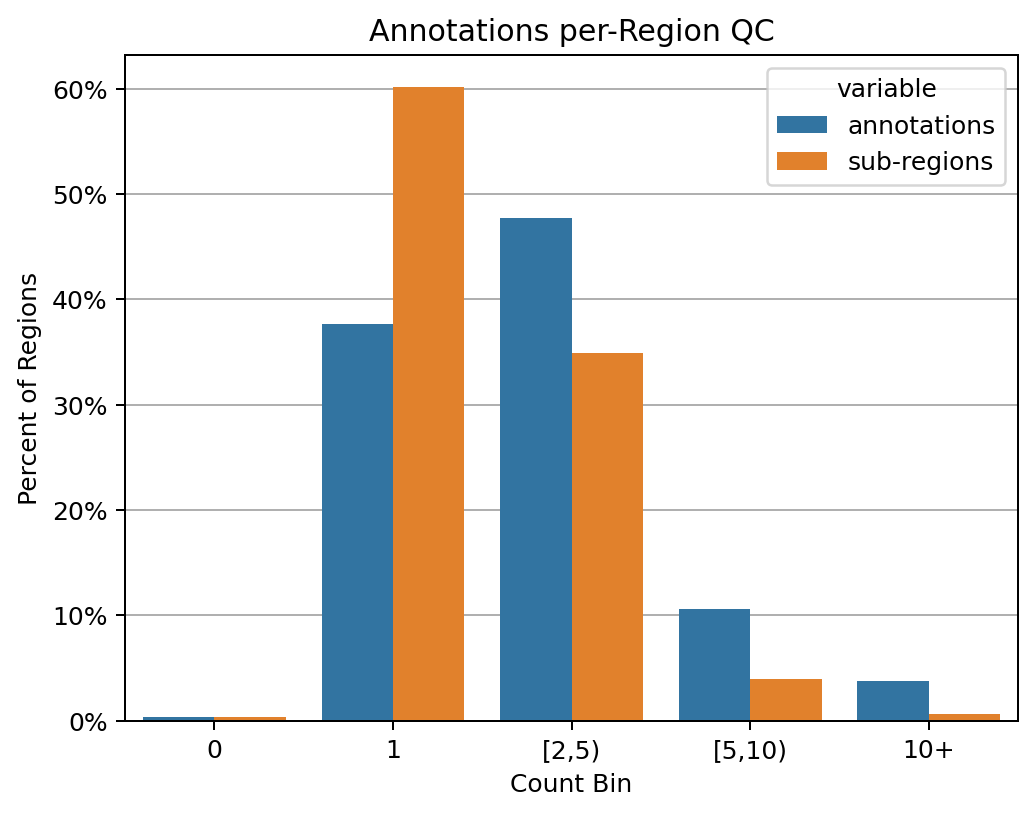

In [67]:
view1 = data['annotation count'].value_counts()
#sb.countplot(data=data, x="annotation count")
view1 = (view1 / view1.sum()) * 100
view2 = data['sub-region count'].value_counts()
#sb.countplot(data=data, x="annotation count")
view2 = (view2 / view2.sum()) * 100
view = pd.concat([view1, view2], axis=1).reset_index()
view.columns=['index', 'annotations', 'sub-regions']
view = view.melt(id_vars=['index'], value_vars=['annotations', 'sub-regions'])

plt.figure(dpi=180)
p = sb.barplot(data=view, x="index", y="value", hue="variable")
xlabels = ['{:,.0f}'.format(x) + '%' for x in p.get_yticks()]
p.set_yticklabels(xlabels)
p.set(title="Annotations per-Region QC", xlabel="Count Bin", ylabel="Percent of Regions")
plt.grid(axis='y')
p.set_axisbelow(True)

/var/folders/fy/lkd5_yz90zq3f67qys3tpztc0000gn/T/ipykernel_73856/1729997960.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  hide = p.set_yticklabels(xlabels)


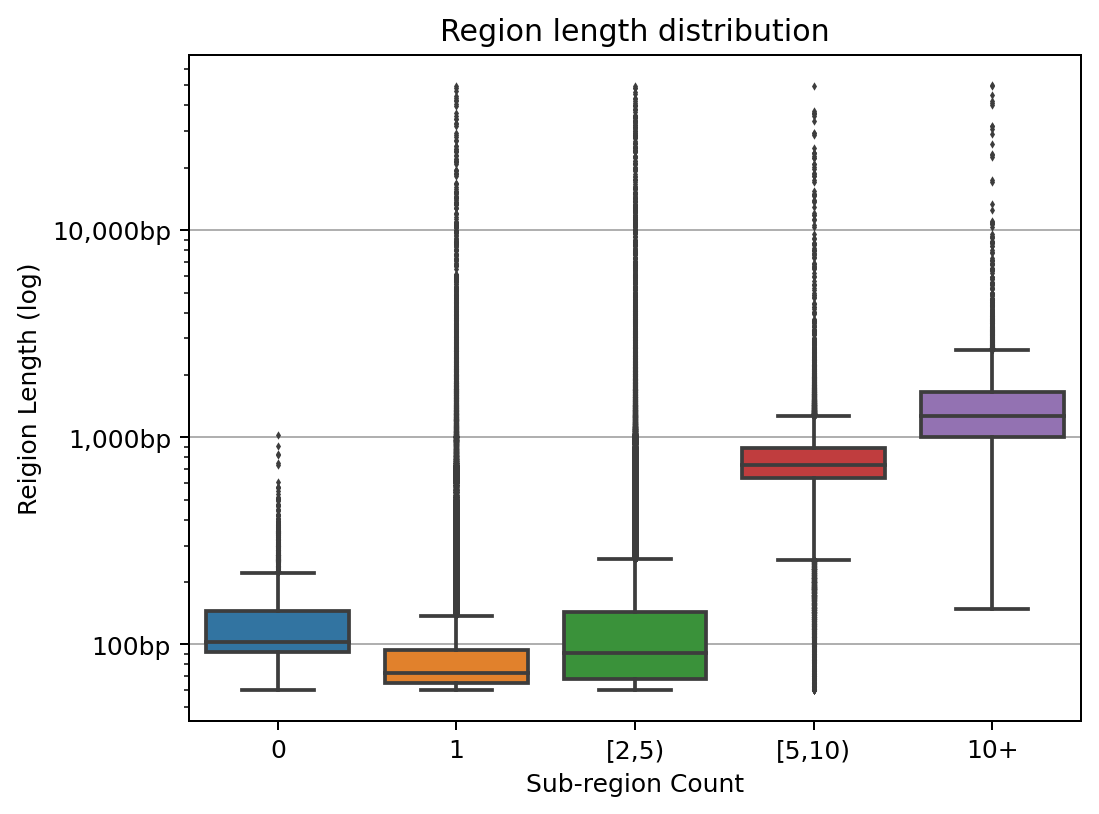

In [68]:
plt.figure(dpi=180)
p = sb.boxplot(data=data, y="len", x="sub-region count",
              flierprops=dict(markersize=1))#data.groupby(['subregion count'])['len']
p.set(yscale='log', ylabel="Reigion Length (log)", 
      xlabel="Sub-region Count", title="Region length distribution")
xlabels = ['{:,.0f}'.format(x) + 'bp' for x in p.get_yticks()]
hide = p.set_yticklabels(xlabels)
plt.grid(axis='y')
p.set_axisbelow(True)

/var/folders/fy/lkd5_yz90zq3f67qys3tpztc0000gn/T/ipykernel_73856/1586367671.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  hide = p.set_yticklabels(xlabels)


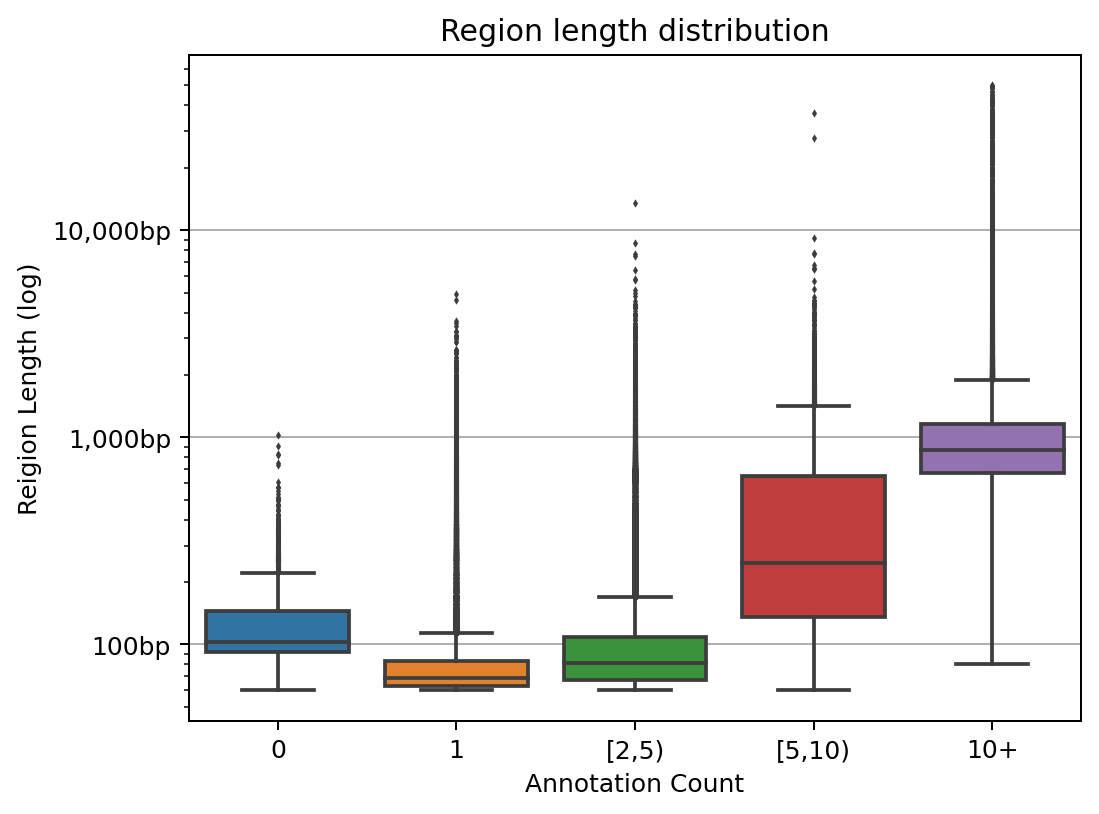

In [69]:
plt.figure(dpi=180)
p = sb.boxplot(data=data, y="len", x="annotation count",
              flierprops=dict(markersize=1))#data.groupby(['subregion count'])['len']
p.set(yscale='log', ylabel="Reigion Length (log)", 
      xlabel="Annotation Count", title="Region length distribution")
xlabels = ['{:,.0f}'.format(x) + 'bp' for x in p.get_yticks()]
hide = p.set_yticklabels(xlabels)
plt.grid(axis='y')
p.set_axisbelow(True)

In [58]:
data[data['mrgcnt'] == 1]['len'].sum()

89390068

In [59]:
data[data['mrgcnt'] == 1].shape

(818386, 8)

In [66]:
view

,index,variable,value
0,"[2,5)",annotations,47.667699
1,1,annotations,37.680901
2,"[5,10)",annotations,10.605432
3,10+,annotations,3.735475
4,0,annotations,0.310493
5,"[2,5)",sub-regions,34.904470
6,1,sub-regions,60.157040
7,"[5,10)",sub-regions,3.981356
8,10+,sub-regions,0.646640
9,0,sub-regions,0.310493
